In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("house_rental_data.csv.txt")
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 8)

In [4]:
data['Unnamed: 0'].nunique()

645

In [5]:
col = ["Unnamed: 0"]
data = data.drop(columns = col)
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [6]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

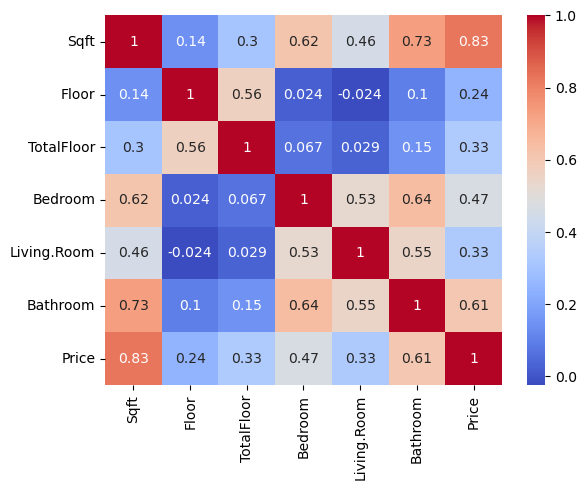

In [7]:
corre = data.corr()
sns.heatmap(corre, annot=True, cmap='coolwarm')
plt.show()

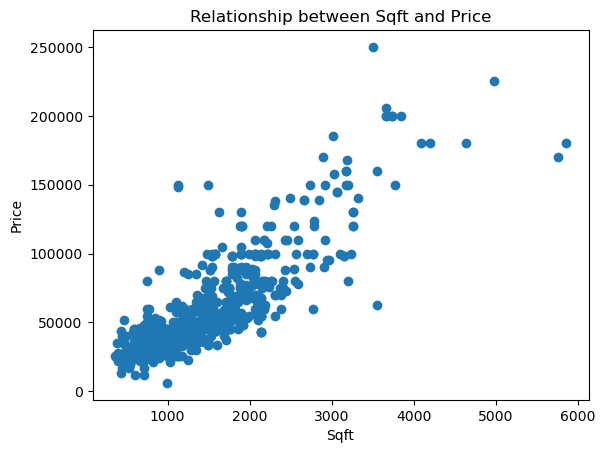

In [8]:
plt.scatter(data['Sqft'], data['Price'])
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Relationship between Sqft and Price')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data[['Sqft','Floor','TotalFloor','Bedroom','Living.Room','Bathroom']]
y = data['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std

StandardScaler()

In [20]:
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [22]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test_scaled)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
mse = mean_squared_error(y_test, y_pred)
mse

401487570.4625884

In [26]:
r2 = r2_score(y_test, y_pred)

In [27]:
r2

0.7202087278032017